In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime

In [2]:
df = pd.read_csv("data/reddit_wsb.csv")

In [3]:
df

,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name,is_self
0,Due to all the manipulation happening on sever...,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611768e+09,Many trading platforms have disabled the abili...,Wed Jan 27 18:18:38 2021,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,t3_l69fvk,True
1,Holding GME till the squeeze has squoze. 6421@21,1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,1.611962e+09,NaN,Sat Jan 30 00:12:20 2021,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,t3_l87ci6,False
2,Going long on my dick,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612416e+09,A month ago I found out that I have a big dick...,Thu Feb 4 06:17:59 2021,0.39,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,t3_lc8dnh,True
3,"TASTYWORKS IS ALSO SETTING ""CERTAIN"" STOCKS TO...",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611852e+09,"""Apex Clearing, who acts as the custodian of a...",Thu Jan 28 17:35:13 2021,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,t3_l71knz,True
4,PLEASE HELP THIS IS A DUMBASS FUCKING QUESTION,4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,1.611849e+09,I\u2019ve been following for a couple years......,Thu Jan 28 16:45:57 2021,0.70,False,/r/wallstreetbets/comments/l70720/please_help_...,t3_l70720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,Damn.. with the government getting involved an...,0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611772e+09,I don\u2019t have much.. but I\u2019d rather n...,Wed Jan 27 19:32:50 2021,0.36,False,/r/wallstreetbets/comments/l6b99w/damn_with_th...,t3_l6b99w,True
38904,DONT BE FOOLED BY PRICE DROP IN $AMC. THE VOLU...,16,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,1.611847e+09,NaN,Thu Jan 28 16:15:16 2021,0.90,False,/r/wallstreetbets/comments/l6zb4b/dont_be_fool...,t3_l6zb4b,False
38905,For everyone searching by new who wants to buy...,77,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,1.611850e+09,This is according to other users in the commen...,Thu Jan 28 17:09:14 2021,1.00,False,/r/wallstreetbets/comments/l70tgo/for_everyone...,t3_l70tgo,True
38906,Why buy GME now,0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,1.612448e+09,Can you retards explain to me why anyone shoul...,Thu Feb 4 15:20:37 2021,0.32,False,/r/wallstreetbets/comments/lcgmi4/why_buy_gme_...,t3_lcgmi4,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38908 entries, 0 to 38907
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         38908 non-null  object 
 1   score         38908 non-null  int64  
 2   id            38908 non-null  object 
 3   url           38908 non-null  object 
 4   comms_num     38908 non-null  int64  
 5   created       38908 non-null  float64
 6   body          20703 non-null  object 
 7   timestamp     38908 non-null  object 
 8   upvote_ratio  38908 non-null  float64
 9   is_oc         38908 non-null  bool   
 10  permalink     38908 non-null  object 
 11  name          38908 non-null  object 
 12  is_self       38908 non-null  bool   
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 3.3+ MB


## Timestamp

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df['timestamp'].describe()

<ipython-input-6-621d3f5dc36a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['timestamp'].describe()


count                   38908
unique                  30147
top       2021-02-02 22:32:58
freq                        9
first     2021-01-19 12:00:21
last      2021-02-11 11:02:43
Name: timestamp, dtype: object

In [7]:
time_df = df.sort_values(by='timestamp')
time_df.head()

,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name,is_self
27381,"Daily Discussion Thread for January 19, 2021",604,l0hnrw,https://www.reddit.com/r/wallstreetbets/commen...,23670,1.611054e+09,Your daily trading discussion thread. Please k...,2021-01-19 12:00:21,0.92,False,/r/wallstreetbets/comments/l0hnrw/daily_discus...,t3_l0hnrw,True
11353,Check out my New Strategy based on Volume,51,l0hqt1,https://www.reddit.com/r/wallstreetbets/commen...,30,1.611054e+09,Hello my fellow retards\n\nAs I already pointe...,2021-01-19 12:05:42,0.87,False,/r/wallstreetbets/comments/l0hqt1/check_out_my...,t3_l0hqt1,True
2798,For all the autists bored af the past few days...,232,l0hw41,https://www.youtube.com/watch?v=ZEcqHA7dbwM,25,1.611055e+09,NaN,2021-01-19 12:16:33,0.99,False,/r/wallstreetbets/comments/l0hw41/for_all_the_...,t3_l0hw41,False
33329,BB vs GME technical analysis,151,l0i42t,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611056e+09,Is BB the next meme stock? From technical poin...,2021-01-19 12:32:49,0.85,False,/r/wallstreetbets/comments/l0i42t/bb_vs_gme_te...,t3_l0i42t,True
16202,Tendieman v3,3563,l0i84t,https://v.redd.it/po3wsz2b0ac61,141,1.611056e+09,NaN,2021-01-19 12:41:18,0.96,True,/r/wallstreetbets/comments/l0i84t/tendieman_v3/,t3_l0i84t,False


In [8]:
min_date = df['timestamp'].min()
earliest_post_url = df.loc[ df['timestamp'] == min_date ]['url']
print(earliest_post_url.values[0])

https://www.reddit.com/r/wallstreetbets/comments/l0hnrw/daily_discussion_thread_for_january_19_2021/


In [9]:
# df_raw = df.copy()
# df.drop(index=earliest_post_url.index[0], inplace=True)

## Nan

In [10]:
df.isna().sum()

title               0
score               0
id                  0
url                 0
comms_num           0
created             0
body            18205
timestamp           0
upvote_ratio        0
is_oc               0
permalink           0
name                0
is_self             0
dtype: int64

## Stats

In [11]:
df[['score', 'comms_num']].describe()

,score,comms_num
count,38908.000000,38908.000000
mean,1067.872725,163.334456
std,8307.818756,2618.259934
min,0.000000,0.000000
25%,7.000000,2.000000
50%,22.000000,7.000000
75%,102.000000,23.000000
max,403161.000000,97996.000000


In [12]:
df[['title', 'body']].describe()

,title,body
count,38908,20703
unique,37433,19543
top,AMC,[deleted]
freq,70,600


## Histograms

In [13]:
def plot_hist(col):
    plt.figure(figsize=(14,6))
    plt.hist(df[col], bins=100)
    plt.plot()

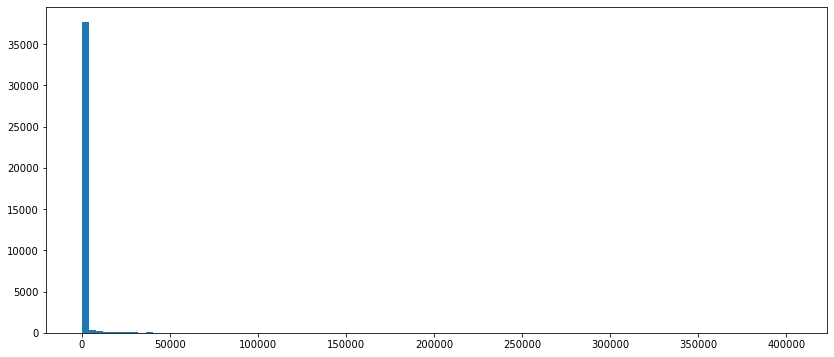

In [14]:
plot_hist('score')

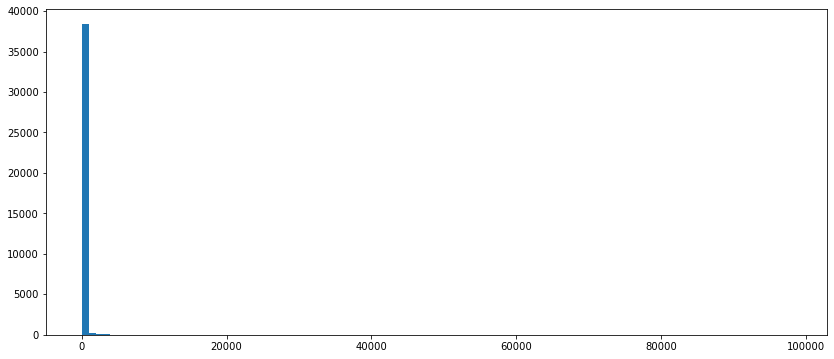

In [15]:
plot_hist('comms_num')

## Created

In [16]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

In [17]:
df['created_datetime'] = df['created'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))

In [18]:
df[['created_datetime', 'timestamp']]

,created_datetime,timestamp
0,2021-01-27 17:18:38,2021-01-27 18:18:38
1,2021-01-29 23:12:20,2021-01-30 00:12:20
2,2021-02-04 05:17:59,2021-02-04 06:17:59
3,2021-01-28 16:35:13,2021-01-28 17:35:13
4,2021-01-28 15:45:57,2021-01-28 16:45:57
...,...,...
38903,2021-01-27 18:32:50,2021-01-27 19:32:50
38904,2021-01-28 15:15:16,2021-01-28 16:15:16
38905,2021-01-28 16:09:14,2021-01-28 17:09:14
38906,2021-02-04 14:20:37,2021-02-04 15:20:37


In [19]:
diff = df['timestamp'] - df['created_datetime']
diff.value_counts()

0 days 01:00:00    38908
dtype: int64

In [20]:
df.drop(['created_datetime', 'created'], axis=1, inplace=True)

## Plots

In [21]:
avg_1_day = df[['score', 'comms_num', 'date']].groupby('date').mean()
avg_1_day['date'] = avg_1_day.index

[]

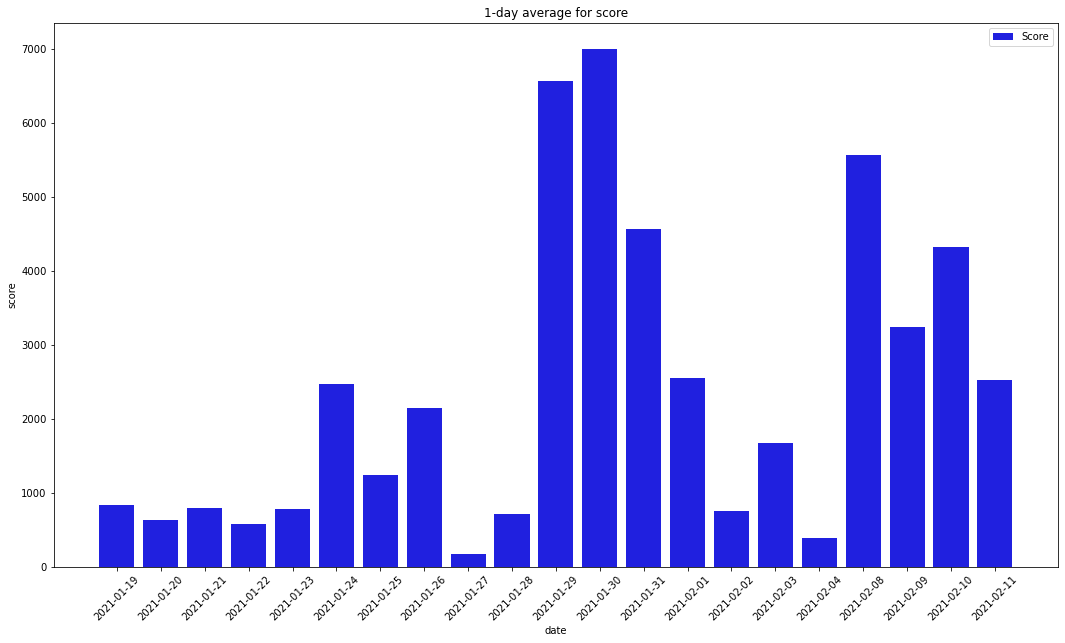

In [22]:
plt.figure(figsize=(18,10))
plt.title("1-day average for score")
sns.barplot(data=avg_1_day, x='date', y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

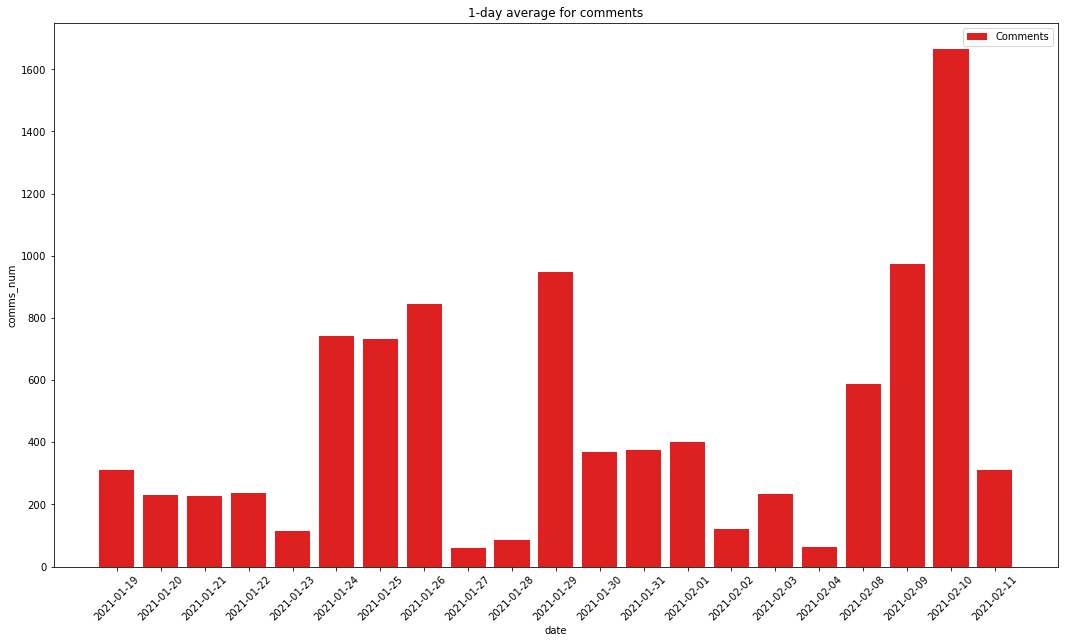

In [23]:
plt.figure(figsize=(18,10))
plt.title("1-day average for comments")
sns.barplot(data=avg_1_day, x='date', y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

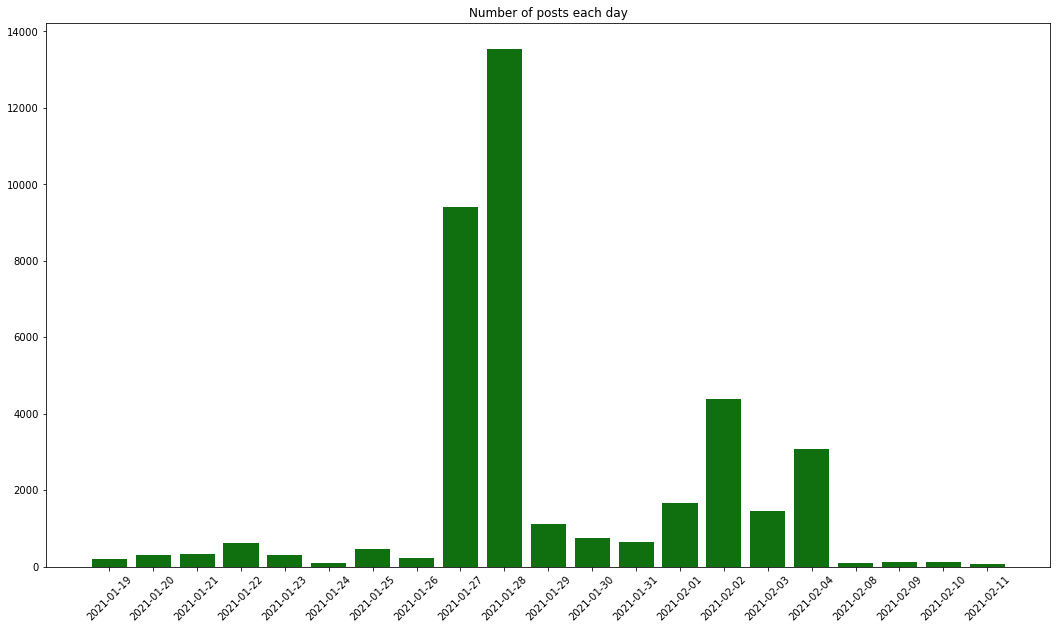

In [24]:
daily_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(18,10))
plt.title("Number of posts each day")
sns.barplot(daily_counts.index, daily_counts.values, color='g')
plt.xticks(rotation=45)
plt.plot()

## Weekday

[]

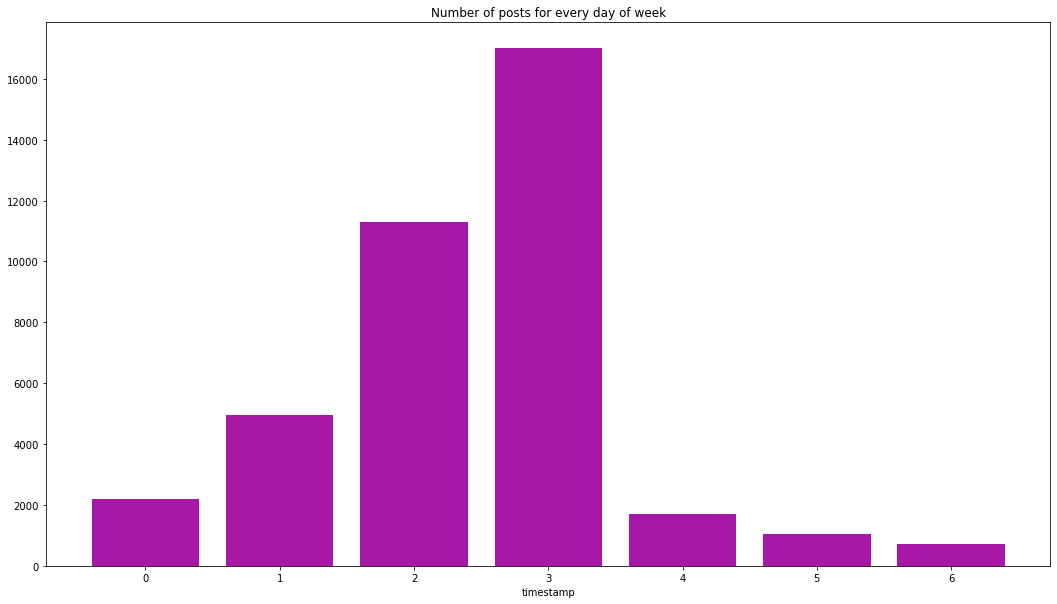

In [25]:
weekday = df['score'].groupby(df['timestamp'].dt.weekday).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every day of week")
sns.barplot(weekday.index, weekday.values, color='m')
plt.plot()

### Odfiltrowanie wartości z 28.01 i 27.01

[]

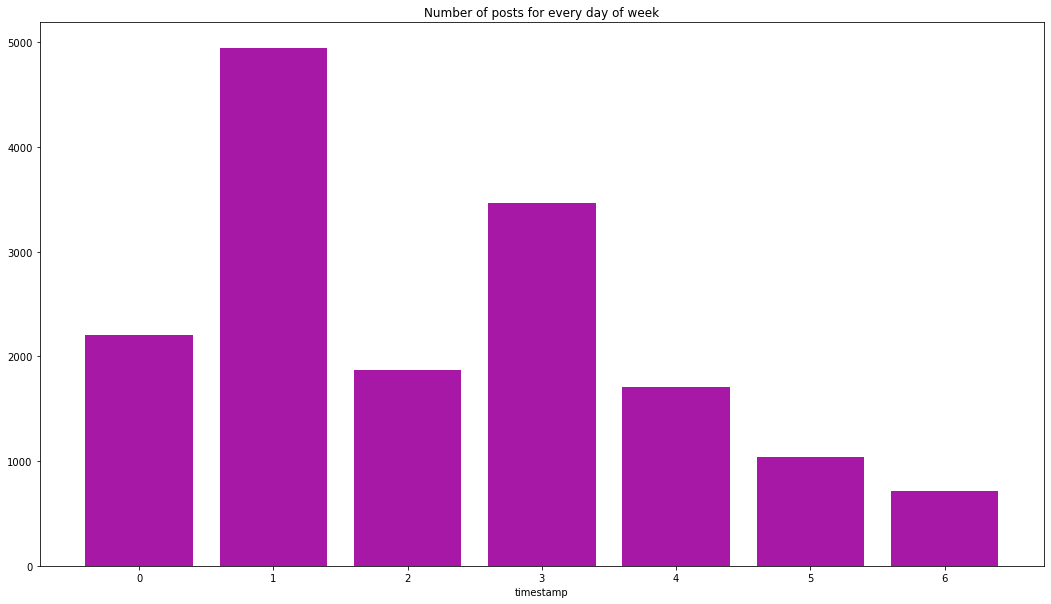

In [26]:
weekday_filtered = df['score'].loc[ (df['date'] != datetime.date(2021,1,28)) & (df['date'] != datetime.date(2021,1,27)) ].groupby(df['timestamp'].dt.weekday).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every day of week")
sns.barplot(weekday_filtered.index, weekday_filtered.values, color='m')
plt.plot()

## Hour

[]

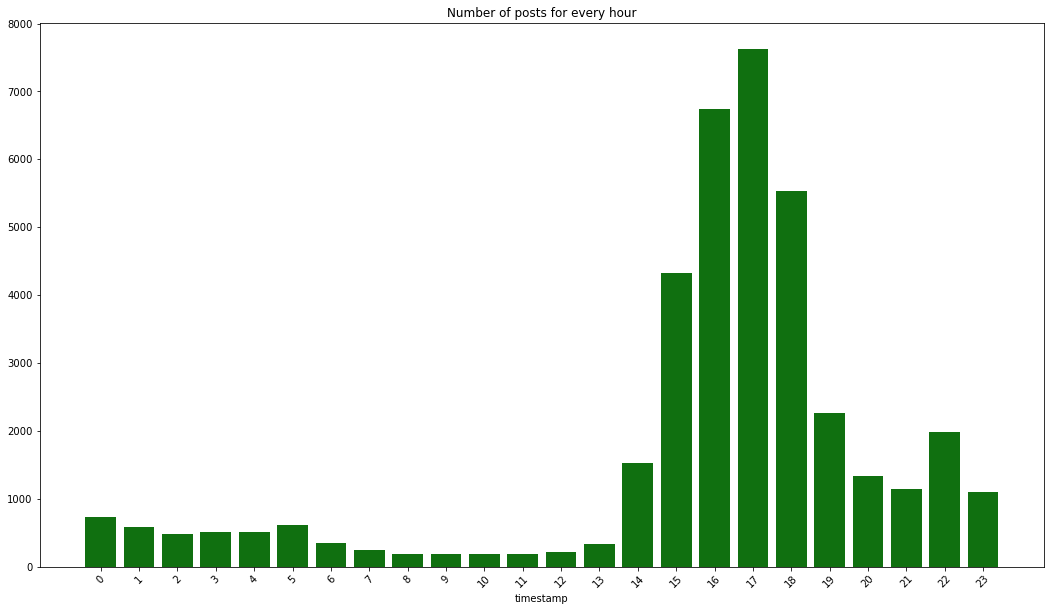

In [27]:
hourly = df['score'].groupby(df['timestamp'].dt.hour).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every hour")
sns.barplot(hourly.index, hourly.values, color='g')
plt.xticks(rotation=45)
plt.plot()

[]

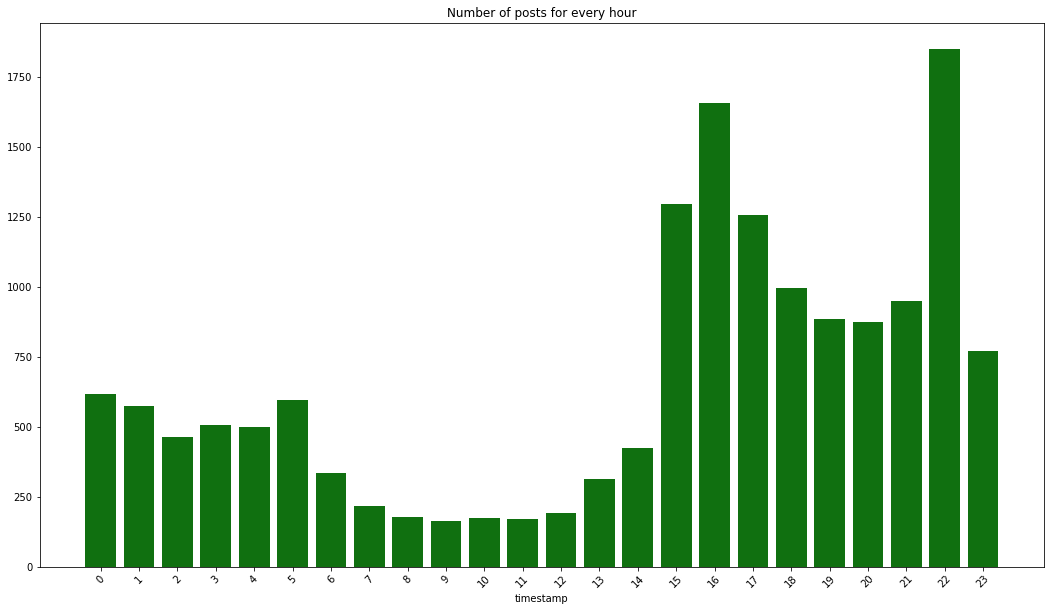

In [28]:
hourly_filtered = df['score'].loc[ (df['date'] != datetime.date(2021,1,28)) & (df['date'] != datetime.date(2021,1,27)) ].groupby(df['timestamp'].dt.hour).count()

plt.figure(figsize=(18,10))
plt.title("Number of posts for every hour")
sns.barplot(hourly_filtered.index, hourly_filtered.values, color='g')
plt.xticks(rotation=45)
plt.plot()

[]

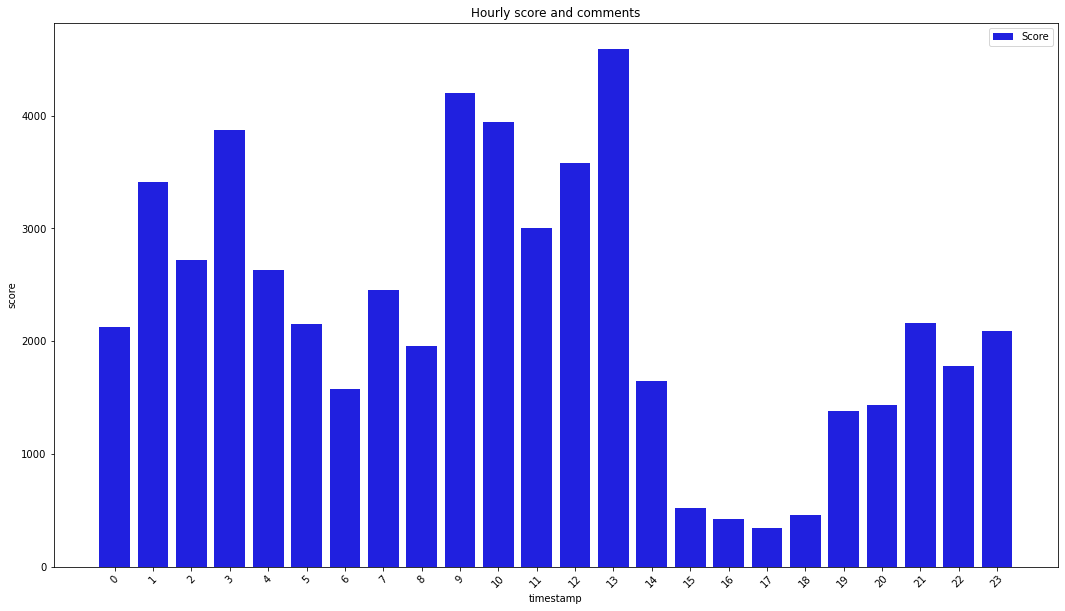

In [29]:
hourly_data = df[['score', 'comms_num']].groupby(df['timestamp'].dt.hour).mean()
hourly_data_filtered = df[['score', 'comms_num']].loc[ (df['date'] != datetime.date(2021,1,28)) & (df['date'] != datetime.date(2021,1,27)) ].groupby(df['timestamp'].dt.hour).mean()

plt.figure(figsize=(18,10))
plt.title("Hourly score and comments")
sns.barplot(data=hourly_data, x=hourly_data.index, y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

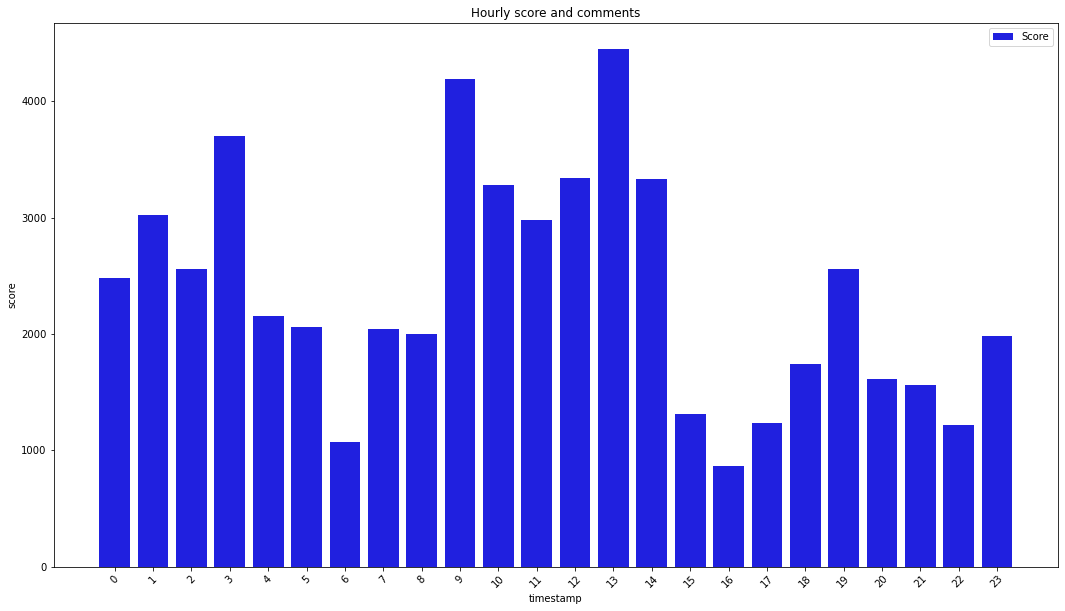

In [30]:
plt.figure(figsize=(18,10))
plt.title("Hourly score and comments")
sns.barplot(data=hourly_data_filtered, x=hourly_data_filtered.index, y='score', color='b', label='Score')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

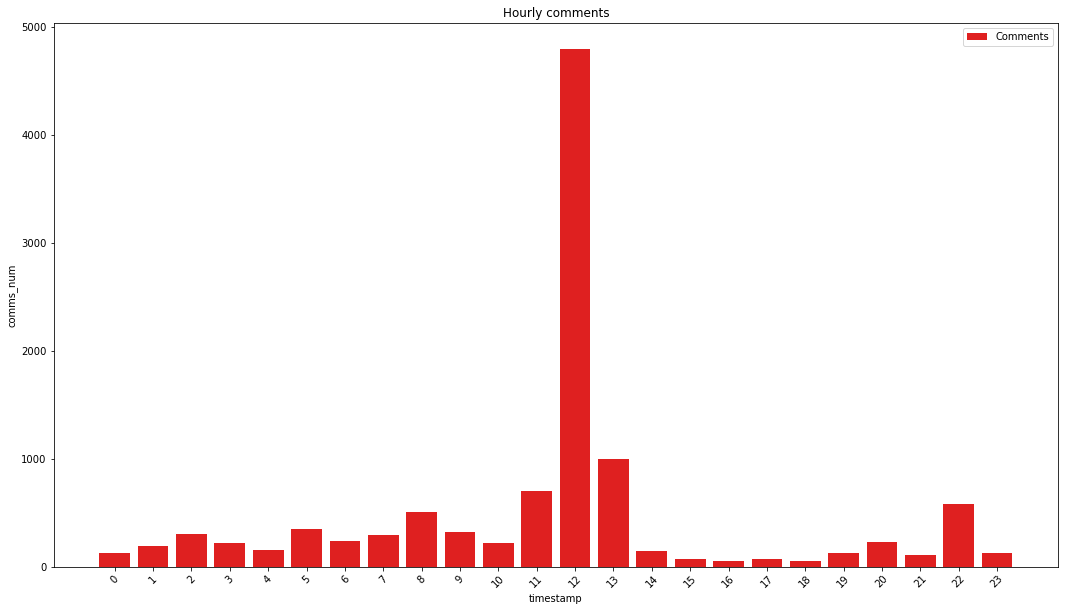

In [31]:
plt.figure(figsize=(18,10))
plt.title("Hourly comments")
sns.barplot(data=hourly_data, x=hourly_data.index, y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

[]

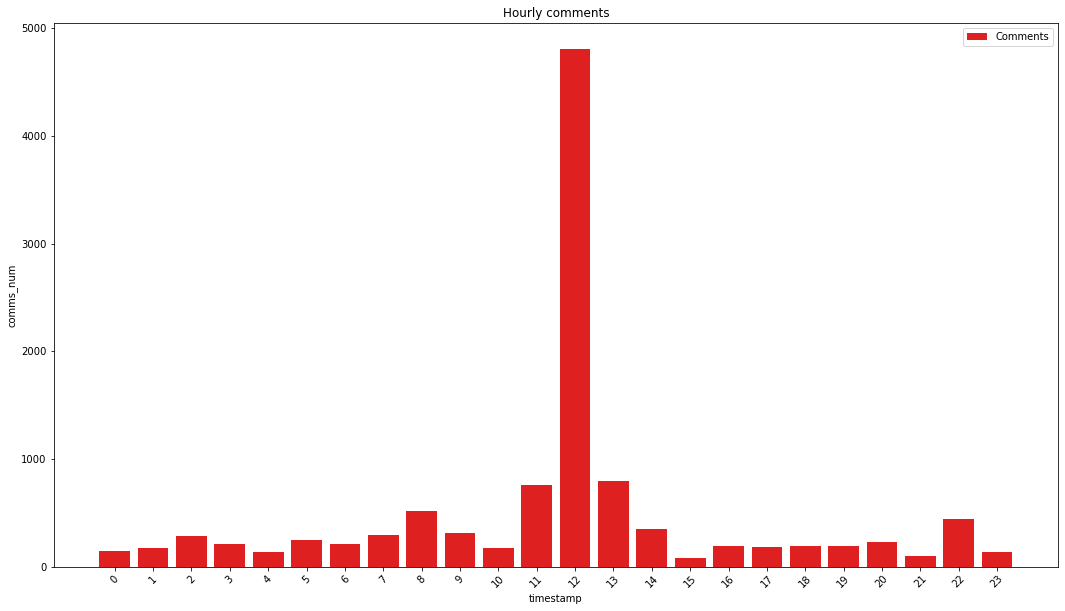

In [32]:
plt.figure(figsize=(18,10))
plt.title("Hourly comments")
sns.barplot(data=hourly_data_filtered, x=hourly_data_filtered.index, y='comms_num', color='r', label='Comments')
plt.legend()
plt.xticks(rotation=45)
plt.plot()

## NLP

In [33]:
import spacy
import nltk
import re

from nltk.stem.porter import *

In [34]:
nlp = spacy.load("en_core_web_sm")

In [35]:
def transform_entities(x):
    if type(x) == spacy.tokens.doc.Doc:
        return x.ents
    return x

In [36]:
def lemmatization(x):
    if type(x) == spacy.tokens.doc.Doc:
        return [token.lemma_ for token in x if not token.is_stop and token.is_alpha]
    return x

In [37]:
df['title'] = df['title'].apply(lambda x: nlp(x))
df['title_raw'] = df['title']
df['title'] = df['title'].apply(lemmatization)

In [38]:
df['body'] = df['body'].apply(lambda x: nlp(x) if type(x) == str else x)
df['body_raw'] = df['body']
df['body'] = df['body'].apply(lemmatization)

## Attributes

In [39]:
def type_check(x):
    return type(x) == spacy.tokens.doc.Doc

def get_punct(x):
    if type_check(x):
        for token in x:
            if token.pos_ == 'PUNCT':
                return 1
    return 0

def get_caps(x):
    if type_check(x):
        caps_perc = 0
        title_len = 0
        for token in x:
            title_len += len(token.shape_)
            caps_perc += token.shape_.count('X')
        return caps_perc / title_len
    return 0.0


def get_urls(x):
    if type_check(x):
        urls = 0
        for token in x:
            if 'https' in str(token):
                urls += 1
        return urls
    return 0

def get_type(x):
    if 'v.redd' in x or 'youtube' in x or 'vimeo' in x:
        return 'video'
    if 'i.redd' in x or 'gallery' in x or 'imgur' in x:
        return 'image'
    if 'reddit' in x:
        return 'text'
    return 'other'

def get_features(df):
    df['title_length'] = df['title_raw'].apply(lambda x: len(x))
    df['title_capital'] = df['title_raw'].apply(get_caps)
    df['body_length'] = df['body_raw'].apply(lambda x: len(x) if type_check(x) else x)
    df['body_urls'] = df['body_raw'].apply(get_urls)
    df['body_punct'] = df['body_raw'].apply(get_punct)
    df['type'] = df['url'].apply(get_type)
    df['deleted'] = (df['type'] == 'text') & df['body'].isna()
    return df

In [40]:
df = get_features(df)

In [41]:
import emoji

EMOJIS = r"(\:[^ ][a-zA-Z0-9\s\_]*\:)"    

def get_emojis(x):
    res = re.findall(EMOJIS, x)
    return res

def decode_emojis(x):
    decoded = emoji.demojize(str(x))
    decoded = decoded.replace('::', ' ')
    emojis = get_emojis(decoded)
    
    emoji_list = []
    for emo in emojis:
        emo = emo.replace(':', '')
        emo = emo.split(" ")
        
        if type(emo) == list:
            emoji_list.extend(emo)
        else:
            emoji_list.append(emo)
        
    return emoji_list

In [42]:
df['title_emojis'] = df['title_raw'].apply(decode_emojis)
df['body_emojis'] = df['body_raw'].apply(decode_emojis)

In [43]:
df['title'] += df['title_emojis']
df['body'] += df['body_emojis']

In [44]:
df.drop(['title_emojis', 'body_emojis'], axis=1, inplace=True)

In [45]:
from collections import Counter

def get_vocab(data, n):
    words = Counter()
    for i in data.index:
        words.update(data.at[i])

    return words

In [46]:
df['body'] = df['body'].fillna(value='')
vocab = get_vocab(df['body'], 1000)

In [47]:
def show_histogram(word_counts, title=None):
    plot_df = pd.DataFrame.from_dict(word_counts).rename(columns={0:'Token', 1:'Count'})
    
    f, ax = plt.subplots(figsize=(12, 15))
    p = sns.barplot(x="Count", y="Token", data=plot_df, color="b")
    p.set(xlabel="Count", ylabel="", title=title)

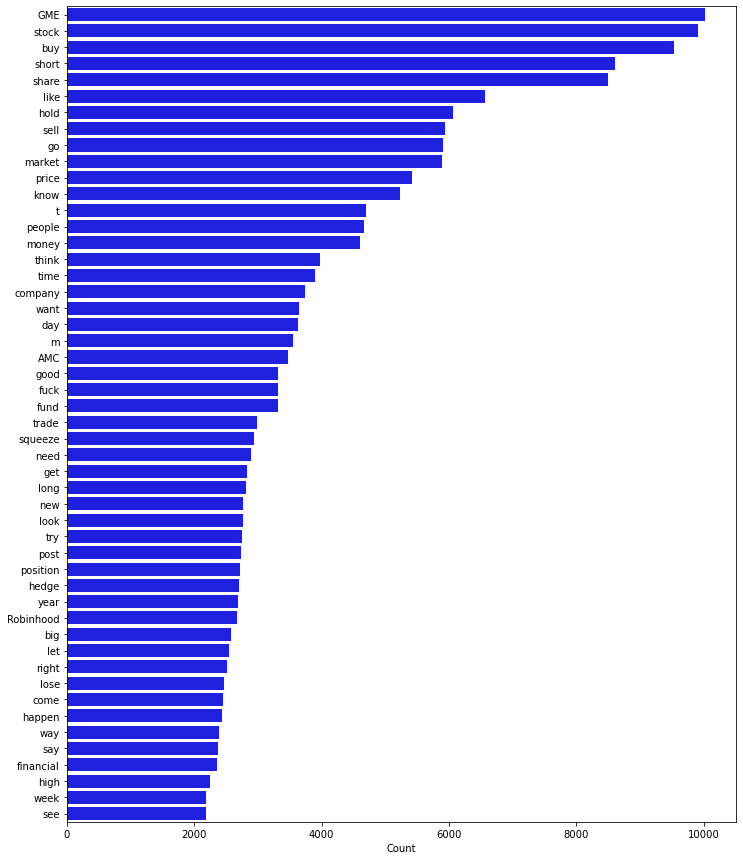

In [48]:
show_histogram(vocab.most_common(50))

In [49]:
def bag_of_words(x, most_freq):
    sent_vec = []
    for token in most_freq:
        if token in x:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    return sent_vec

In [50]:
feature_dict = [key for key, _ in vocab.most_common(200)]

df['body_bow'] = df['body'].apply(lambda x: bag_of_words(x, feature_dict))

#### Title - bag of words

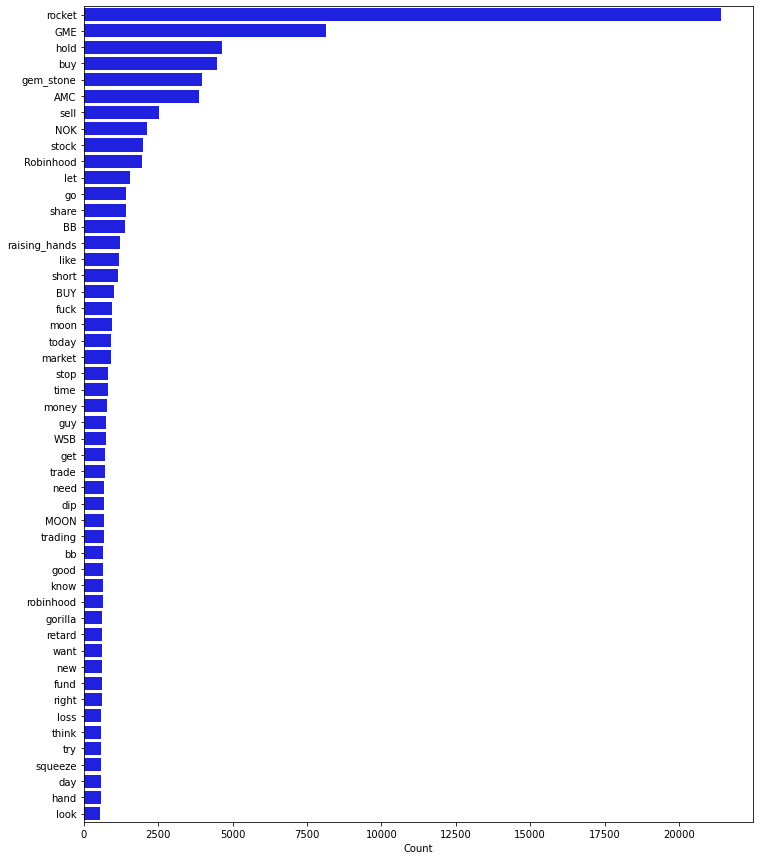

In [51]:
df['title'] = df['title'].fillna(value='')
vocab = get_vocab(df['title'], 1000)
show_histogram(vocab.most_common(50))

In [52]:
feature_dict = [key for key, _ in vocab.most_common(200)]

df['title_bow'] = df['title'].apply(lambda x: bag_of_words(x, feature_dict))

In [53]:
df

,title,score,id,url,comms_num,body,timestamp,upvote_ratio,is_oc,permalink,...,body_raw,title_length,title_capital,body_length,body_urls,body_punct,type,deleted,body_bow,title_bow
0,"[manipulation, happen, different, platform, cr...",4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,"[trading, platform, disable, ability, buy, sel...",2021-01-27 18:18:38,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,...,"(Many, trading, platforms, have, disabled, the...",18,0.068966,29.0,0,1,text,False,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[hold, GME, till, squeeze, squoze]",1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,,2021-01-30 00:12:20,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,...,NaN,9,0.117647,NaN,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[go, long, dick]",0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,"[month, ago, find, big, dick, thank, UK, newsp...",2021-02-04 06:17:59,0.39,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,...,"(A, month, ago, I, found, out, that, I, have, ...",5,0.058824,155.0,0,1,text,False,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,"[TASTYWORKS, set, certain, stock, close]",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,"[Apex, Clearing, act, custodian, tastywork, ac...",2021-01-28 17:35:13,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,...,"("", Apex, Clearing, ,, who, acts, as, the, cus...",11,0.941176,110.0,0,1,text,False,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,"[help, dumbas, FUCKING, question]",4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,"[follow, couple, year, start, buy, day, plan, ...",2021-01-28 16:45:57,0.70,False,/r/wallstreetbets/comments/l70720/please_help_...,...,"(I\u2019ve, been, following, for, a, couple, y...",8,1.000000,41.0,0,1,text,False,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,"[damn, government, getting, involve, stock, ge...",0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,"[t, lose, power, have, ability, manipulate, go...",2021-01-27 19:32:50,0.36,False,/r/wallstreetbets/comments/l6b99w/damn_with_th...,...,"(I, don\u2019, t, have, much, .., but, I\u2019...",20,0.033333,37.0,0,1,text,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
38904,"[DONT, fool, price, drop, AMC, volume, LOW, fi...",16,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,,2021-01-28 16:15:16,0.90,False,/r/wallstreetbets/comments/l6zb4b/dont_be_fool...,...,NaN,29,0.583333,NaN,0,0,image,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38905,"[search, new, want, buy, GME, buy, Fidelity]",77,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,"[accord, user, comment, use, wire, transfer]",2021-01-28 17:09:14,1.00,False,/r/wallstreetbets/comments/l70tgo/for_everyone...,...,"(This, is, according, to, other, users, in, th...",16,0.104167,18.0,0,1,text,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38906,"[buy, GME]",0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,"[retard, explain, buy, hold, GME, inflated, pr...",2021-02-04 15:20:37,0.32,False,/r/wallstreetbets/comments/lcgmi4/why_buy_gme_...,...,"(Can, you, retards, explain, to, me, why, anyo...",4,0.333333,46.0,0,1,text,False,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [54]:
df[['title_length', 'title_capital', 'body_length', 'body_urls']].describe()

,title_length,title_capital,body_length,body_urls
count,38908.000000,38908.000000,20703.000000,38908.000000
mean,13.275907,0.275971,114.334686,0.227048
std,10.943288,0.302223,259.281598,1.468252
min,1.000000,0.000000,1.000000,0.000000
25%,6.000000,0.066667,13.000000,0.000000
50%,10.000000,0.145833,35.000000,0.000000
75%,17.000000,0.333333,107.000000,0.000000
max,270.000000,1.000000,8650.000000,52.000000


In [55]:
df['body_punct'].sum() / df['body_length'].count()

0.8782302081823891

In [56]:
df['body_urls'].sum() / df['body_length'].count()

0.426701444235135

In [57]:
df['deleted'].sum() / df['body_length'].count()

0.1956238226344008

[]

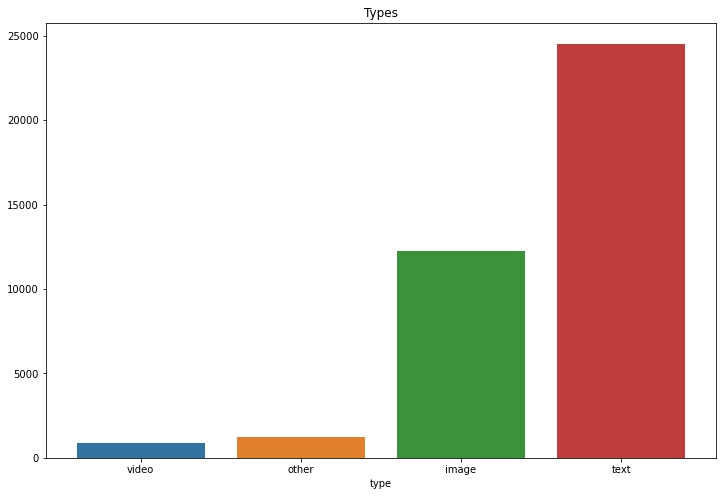

In [58]:
types = df['type'].value_counts()

plt.figure(figsize=(12,8))
plt.title("Types")
ax = sns.barplot(data=types, x=types.index, y=types.values)
ax.set_xticklabels(reversed(types.index))
plt.plot()

## Save csv

In [59]:
df.to_csv("data/wsb_interim.csv")